In [1]:
import vtk
import numpy as np
from numpy.fft import fft2, fftshift
from scipy.fftpack import fftfreq
from scipy.interpolate import griddata
import matplotlib.pyplot as plt


In [29]:
filename = r"C:\Users\pneve\Desktop\Thesis\DataAnalysis\ccor_long_pres\cubic.vtk"
reader = vtk.vtkStructuredPointsReader()  # Use vtkStructuredPointsReader for structured points data
reader.SetFileName(filename)  # Update this path
reader.Update()
# Get the structured grid from the reader
structured_grid = reader.GetOutput()
points = structured_grid.GetCellData()

# Access each component of the velocity vectors
u_x_array = points.GetArray("u.x")
u_y_array = points.GetArray("u.y")
u_z_array = points.GetArray("u.z")

if u_x_array and u_y_array and u_z_array:
    # Get the number of cells in the dataset
    num_cells = structured_grid.GetNumberOfCells()
    print("Number of cells:", num_cells)

    # Iterate through each cell to construct and print the velocity vector
    for cell_id in range(num_cells):
        # Get the components of the velocity vector for the current cell
        u_x = u_x_array.GetTuple1(cell_id)
        u_y = u_y_array.GetTuple1(cell_id)
        u_z = u_z_array.GetTuple1(cell_id)

u_x_array = np.array(u_x_array)
u_x_fluc = u_x_array - np.mean(u_x_array)
u_y_array = np.array(u_y_array)
u_y_fluc = u_y_array - np.mean(u_y_array)
u_z_array = np.array(u_z_array)
u_z_fluc = u_z_array - np.mean(u_z_array)
nz,ny= 128,128

u_x_2d = u_x_fluc.reshape((nz, ny))
u_y_2d = u_y_fluc.reshape((nz, ny))
u_z_2d = u_z_fluc.reshape((nz, ny))

u_mag_2d = np.sqrt(u_x_2d**2 + u_y_2d**2 + u_z_2d**2)
    


Number of cells: 16384


In [46]:
# Apply FFT to each component
fft_u_x = fft2(u_x_2d)
fft_u_y = fft2(u_y_2d)
fft_u_z = fft2(u_z_2d)
fft_mag = fft2(u_mag_2d)

# Optionally, you can shift the zero frequency component to the center of the spectrum
fft_u_x_shifted = fftshift(fft_u_x)
fft_u_y_shifted = fftshift(fft_u_y)
fft_u_z_shifted = fftshift(fft_u_z)
fft_mag_shifted = fftshift(fft_mag)

#phase shift
phase_x = np.angle(fft_u_x_shifted)
phase_y = np.angle(fft_u_y_shifted)
phase_z = np.angle(fft_u_z_shifted)

print(phase_x)

fft_mag_x = np.abs(fft_u_x_shifted)
fft_mag_y = np.abs(fft_u_y_shifted)
fft_mag_z = np.abs(fft_u_z_shifted)

#fft_mag = np.sqrt(fft_mag_x**2 + fft_mag_y**2 + fft_mag_z**2)

# Get the spatial frequencies in the x and y directions

[[ 3.14159265 -3.13828273  3.13902564 ...  3.1304716  -3.13902564
   3.13828273]
 [-3.10363253 -3.10098121 -3.10687043 ... -3.10459196 -3.0995904
  -3.10502881]
 [-3.0609601  -3.05298853 -3.06164082 ... -3.08766835 -3.06251557
  -3.06573053]
 ...
 [ 3.11060202  3.11602139  3.10631853 ...  3.09996615  3.11770029
   3.11164542]
 [ 3.0609601   3.06573053  3.06251557 ...  3.0376494   3.06164082
   3.05298853]
 [ 3.10363253  3.10502881  3.0995904  ...  3.09687679  3.10687043
   3.10098121]]


C:\Users\pneve\AppData\Local\Temp\ipykernel_22180\2326497662.py:32: UserWarning: The following kwargs were not used by contour: 'label'
  plot = plt.contourf(X, Y, u_z_2d, label='FFT Magnitude')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Wave number resolutions: 0.012566370614359173 0.012566370614359173
(128, 128) (128, 128)


"\n# Plotting\nplt.pcolormesh(theta_grid, r_grid, polar_data.T)  # Transpose to align axes correctly\nplt.xlabel('Theta (radians)')\nplt.ylabel('Frequency Magnitude (r)')\nplt.title('Polar Plot of FFT Magnitude')\nplt.colorbar(label='FFT Magnitude')\nplt.show()\n\n\n\n# Plotting\nplt.figure()\nplt.contour(kz, ky, np.sqrt(kz**2+ky**2), shading='auto', levels=10)\n#plt.xlim(0, kz.max())\n#plt.ylim(0, ky.max())\nplt.show()\n"

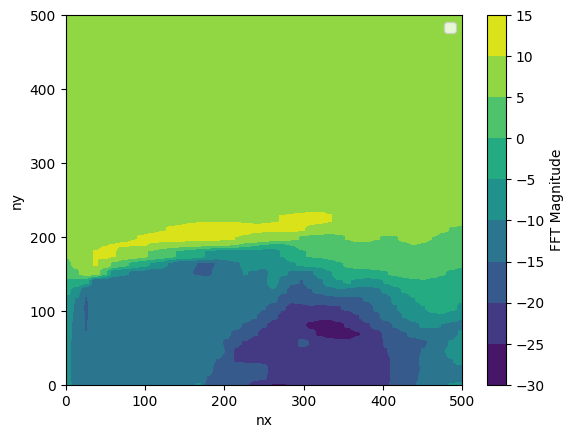

In [41]:
# Assuming nx, ny are the dimensions of your 2D data, and Lx, Ly are the physical dimensions of your domain
nz, ny = 128, 128  # Number of points in each spatial direction
Lz, Ly = 500.0, 500.0  # Physical domain size in each direction

# Calculate wave number resolutions
dz = Lz / (nz-1)
dy = Ly / (ny-1)
kz_res = 2 * np.pi / Lz
ky_res = 2 * np.pi / Ly
print("Wave number resolutions:", kz_res, ky_res)

# Generate wave number arrays
kz = np.fft.fftfreq(nz, d=dz) * 2 * np.pi
ky = np.fft.fftfreq(ny, d=dy) * 2 * np.pi

kz = np.fft.fftshift(kz)
ky = np.fft.fftshift(ky)

kz, ky = np.meshgrid(kz, ky, indexing='ij')
x =np.arange(u_x_2d.shape[1])
y = np.arange(u_x_2d.shape[0])

x=np.linspace(0, Lz, nz)
y=np.linspace(0, Ly, ny)


X, Y = np.meshgrid(x, y, indexing='ij')

print(X.shape, Y.shape)

plt.figure()
plot = plt.contourf(X, Y, u_z_2d, label='FFT Magnitude')
plt.colorbar(plot, label='FFT Magnitude')
plt.xlabel('nx')
plt.ylabel('ny')
plt.legend()



r= np.sqrt(kz**2 + ky**2)
theta = np.arctan2(kz, ky)

# Define the radial and angular boundaries of your polar grid
r_min, r_max = 0, np.max(r)
theta_min, theta_max = -np.pi, np.pi

# Specify the resolution of your polar grid
r_resolution = 100  # Number of radial points
theta_resolution = 100  # Number of angular points (theta)

# Create the radial and angular grids
r_grid = np.linspace(r_min, r_max, r_resolution)
theta_grid = np.linspace(theta_min, theta_max, theta_resolution)

# Flatten your polar coordinates and data
r_flat = r.flatten()
theta_flat = theta.flatten()
data_flat = fft_mag.flatten()  # Assuming 'data' is your quantity of interest


# Create a meshgrid for interpolation
R, Theta = np.meshgrid(r_grid, theta_grid)

# Interpolate using griddata
polar_data = griddata((r_flat, theta_flat), data_flat, (R.flatten(), Theta.flatten()), method='linear')
polar_data = polar_data.reshape((theta_resolution, r_resolution))

'''
# Plotting
plt.pcolormesh(theta_grid, r_grid, polar_data.T)  # Transpose to align axes correctly
plt.xlabel('Theta (radians)')
plt.ylabel('Frequency Magnitude (r)')
plt.title('Polar Plot of FFT Magnitude')
plt.colorbar(label='FFT Magnitude')
plt.show()



# Plotting
plt.figure()
plt.contour(kz, ky, np.sqrt(kz**2+ky**2), shading='auto', levels=10)
#plt.xlim(0, kz.max())
#plt.ylim(0, ky.max())
plt.show()
'''

AttributeError: 'PolarAxes' object has no attribute 'colorbar'

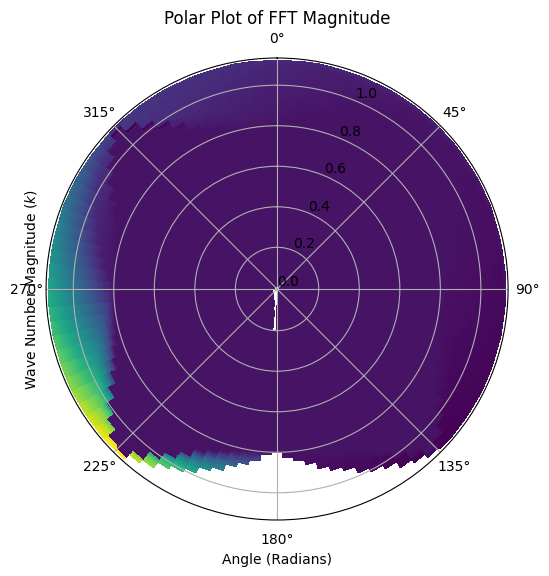

In [45]:
# Theta should be in radians, and R is your radial coordinate
Theta, R = np.meshgrid(theta_grid, r_grid)  # Ensure these are in the correct order

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)

# Plotting the data. Note: transpose polar_data if needed to match the dimensions of Theta and R
ax.pcolormesh(Theta, R, np.real(polar_data.T), shading='nearest')  # Use 'auto' for automatic shading determination

# Labeling
ax.set_xlabel('Angle (Radians)')
ax.set_ylabel('Wave Number Magnitude ($k$)')
ax.set_title('Polar Plot of FFT Magnitude')

# Optional: Set the direction of theta increasing ('clockwise' or 'counterclockwise') and where 0 angle is
ax.set_theta_direction(-1)  # Negative for clockwise
ax.set_theta_zero_location('N')  # Zero angle at the top

ax.colorbar()
plt.show()


Text(0.5, 1.0, 'FFT Magnitude vs. Wave Number')

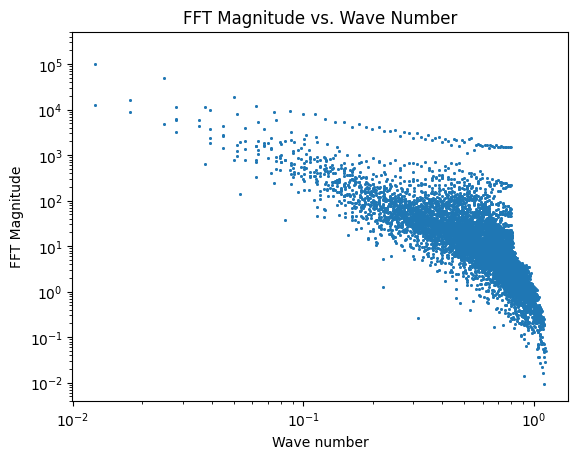

In [ ]:

k_mag = np.sqrt(kz**2 + ky**2)
k_flat = k_mag.flatten()    

sorted_indices = np.argsort(k_flat)
k_flat_sorted = k_flat[sorted_indices]
fft_magnitude_sorted = fft_mag_x.flatten()[sorted_indices]  

plt.figure()
plt.loglog(k_flat_sorted, fft_magnitude_sorted, 'o', markersize=1)
plt.xlabel('Wave number')
plt.ylabel('FFT Magnitude')
plt.title('FFT Magnitude vs. Wave Number')


In [ ]:


# Assuming the sorted k_flat and fft_magnitude_squared_sorted arrays are correctly calculated
unique_ks, unique_indices = np.unique(k_flat_sorted, return_index=True)

# Calculate the bins for the wavenumbers - ensuring every unique k is accounted for
k_bins = np.linspace(np.min(k_flat_sorted), np.max(k_flat_sorted), num=len(unique_ks)+1)
energy_sum, _ = np.histogram(k_flat_sorted, bins=k_bins, weights=bin_means_nonzero**2)
counts, _ = np.histogram(k_flat_sorted, bins=k_bins)

# Avoid division by zero
counts[counts == 0] = 1
average_energy = energy_sum / counts

# Since we're using the edges of bins to calculate the histogram, the k values for plotting should be the midpoints of these bins
k_midpoints1 = 0.5 * (k_bins[1:] + k_bins[:-1])

# Plotting the energy spectrum
plt.figure()
plt.loglog(k_midpoints1, average_energy, 'o-', markersize=1)
plt.xlabel('Wavenumber')
plt.ylabel('Energy Spectral Density')
plt.title('Energy Spectrum')
plt.grid(True)
plt.show()


ValueError: weights should have the same shape as a.

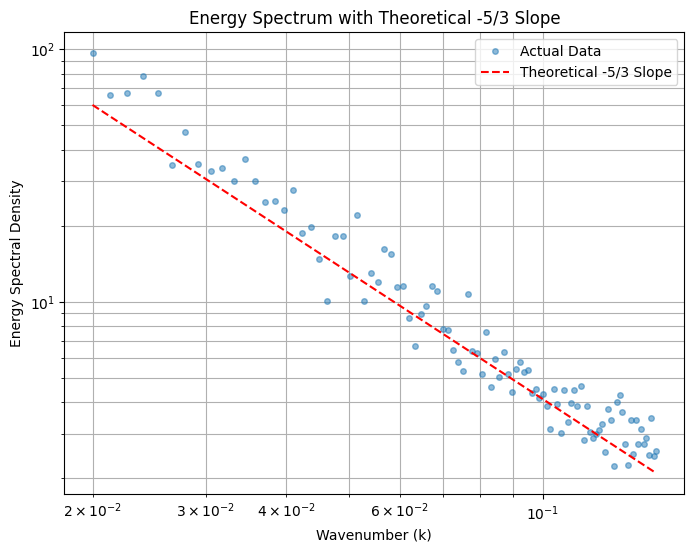

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating hypothetical data for illustration
np.random.seed(0)  # For reproducibility
k_midpoints = np.linspace(0.02, .15, 100)  # Wavenumber range
# Hypothetical energy spectral density, not strictly following -5/3 to simulate real data
selected_average_energy = (1e-1 * k_midpoints ** (-5/3)) * np.exp(np.random.normal(0, 0.2, 100))

# Assuming these are your data for the demonstration
k_min = 0.02
k_max = 0.15

# Select a reference point (k_ref, E_ref) within the inertial subrange
k_ref = np.median(k_midpoints[(k_midpoints >= k_min) & (k_midpoints <= k_max)])
E_ref = np.median(selected_average_energy[(k_midpoints >= k_min) & (k_midpoints <= k_max)])

# Calculate the constant C using the -5/3 slope
C = E_ref / k_ref ** (-5/3)

# Generate a k range for plotting the theoretical line
k_theoretical = np.linspace(k_min, k_max, 100)
E_theoretical = C * k_theoretical ** (-5/3)

# Plotting the actual data and the -5/3 slope line
plt.figure(figsize=(8, 6))
plt.loglog(k_midpoints, selected_average_energy, 'o', markersize=4, label='Actual Data', alpha=0.5)
plt.loglog(k_theoretical, E_theoretical, label='Theoretical -5/3 Slope', color='red', linestyle='--')
plt.xlabel('Wavenumber (k)')
plt.ylabel('Energy Spectral Density')
plt.title('Energy Spectrum with Theoretical -5/3 Slope')
plt.legend()
plt.grid(True, which="both")
plt.show()


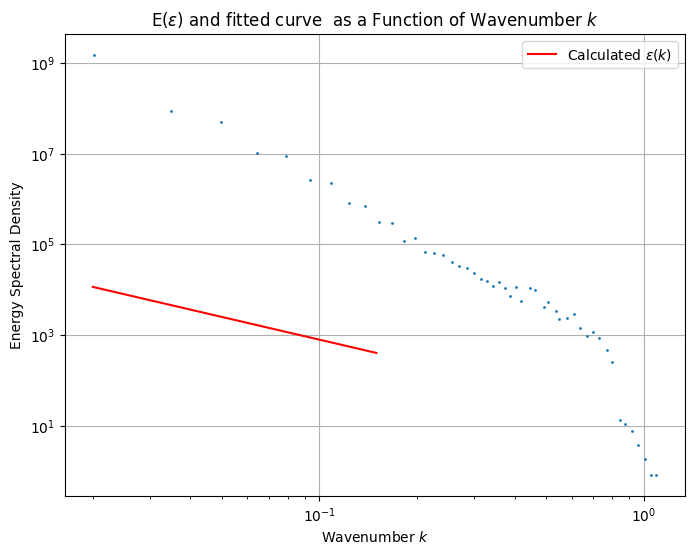

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

C=17

# Example values for C and k_values in the inertial subrange
k_values = np.linspace(0.02, .15, 100)  # Example wavenumber range; adjust as needed
E_k_values = C * k_values ** (-5/3)  # This would be your actual spectral data in practice

# Calculate epsilon for each k using the derived relationship
epsilon_values = ((selected_average_energy) / (C*k_midpoints**(-5/3)))**(3/2)

# Plotting epsilon as a function of k
plt.figure(figsize=(8, 6))
plt.loglog(k_values, E_k_values, 'r-', label='Calculated $\epsilon(k)$')
plt.loglog(k_midpoints1, average_energy, 'o', markersize=1)
plt.xlabel('Wavenumber $k$')
plt.ylabel('Energy Spectral Density')
plt.title('E($\epsilon$) and fitted curve  as a Function of Wavenumber $k$')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


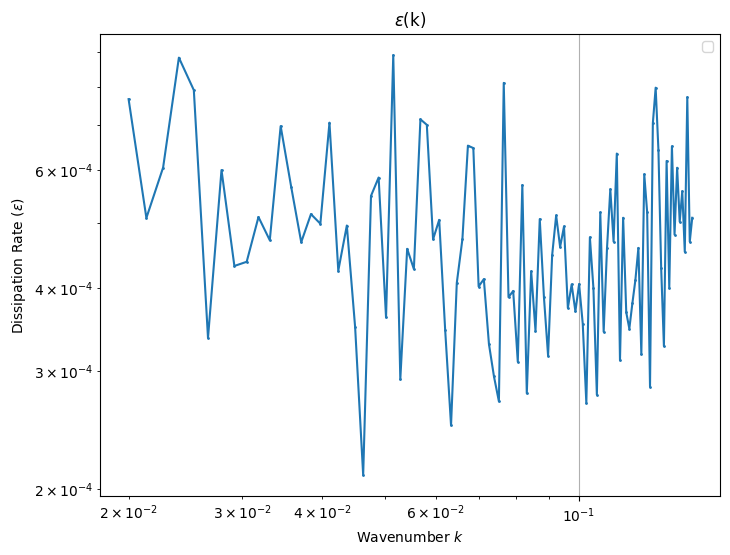

In [ ]:
plt.figure(figsize=(8, 6))
plt.loglog(k_midpoints, epsilon_values, 'o-', markersize=1)
plt.xlabel('Wavenumber $k$')
plt.ylabel('Dissipation Rate ($\epsilon$)')
plt.title('$\epsilon$(k)')
plt.legend()
plt.grid(True)
plt.show()